In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/better_processed/wszystko.csv', sep=';')
data = data.bfill()
data = data.ffill()
data.head()

,FIPS code,State,County,"Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980",...,2021 HPI Change,2021 Personal income (thousands of dollars),2021 Population (persons) 1/,2021 Population (persons) 1/.1,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,2022 HPI Change,NPOPCHG2022
0,1001,Alabama,Autauga County,933.0,767.0,54.8,31.1,7.7,6.4,7074.0,...,8.14,2857062,59095,59095,26341.0,25599.0,742.0,2.8,12.95,549
1,1003,Alabama,Baldwin County,2334.0,2038.0,59.4,26.7,7.4,6.5,18125.0,...,13.14,13079505,239294,239294,99427.0,96481.0,2946.0,3.0,16.41,7074
2,1005,Alabama,Barbour County,581.0,861.0,68.8,19.0,4.9,7.3,7759.0,...,9.35,1009235,24964,24964,8197.0,7728.0,469.0,5.7,16.31,167
3,1007,Alabama,Bibb County,238.0,302.0,73.1,19.4,3.3,4.2,5254.0,...,6.02,829213,22477,22477,8560.0,8262.0,298.0,3.5,13.74,-365
4,1009,Alabama,Blount County,626.0,404.0,70.5,22.7,4.1,2.7,11666.0,...,10.45,2517168,59041,59041,25127.0,24529.0,598.0,2.4,17.33,427


In [4]:
data['logic'] = np.where(data['NPOPCHG2022'] > 0, 1, 0)

In [9]:
X = data.iloc[:, 3:-2]
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = data.iloc[:, -1]

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

In [66]:
# plt.figure(figsize=(15, 15))
# %matplotlib inline
# sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['logic'])

In [19]:
tsne = TSNE(n_components=2, perplexity=40)
tsne_data = tsne.fit_transform(X_scaled)

c:\Users\Filif\anaconda3\envs\torch_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Filif\anaconda3\envs\torch_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
# plt.figure(figsize=(15, 15))
# sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data['logic'])

In [26]:
umap = UMAP(n_components=2)
umap_data = umap.fit_transform(X_scaled)

<AxesSubplot:>

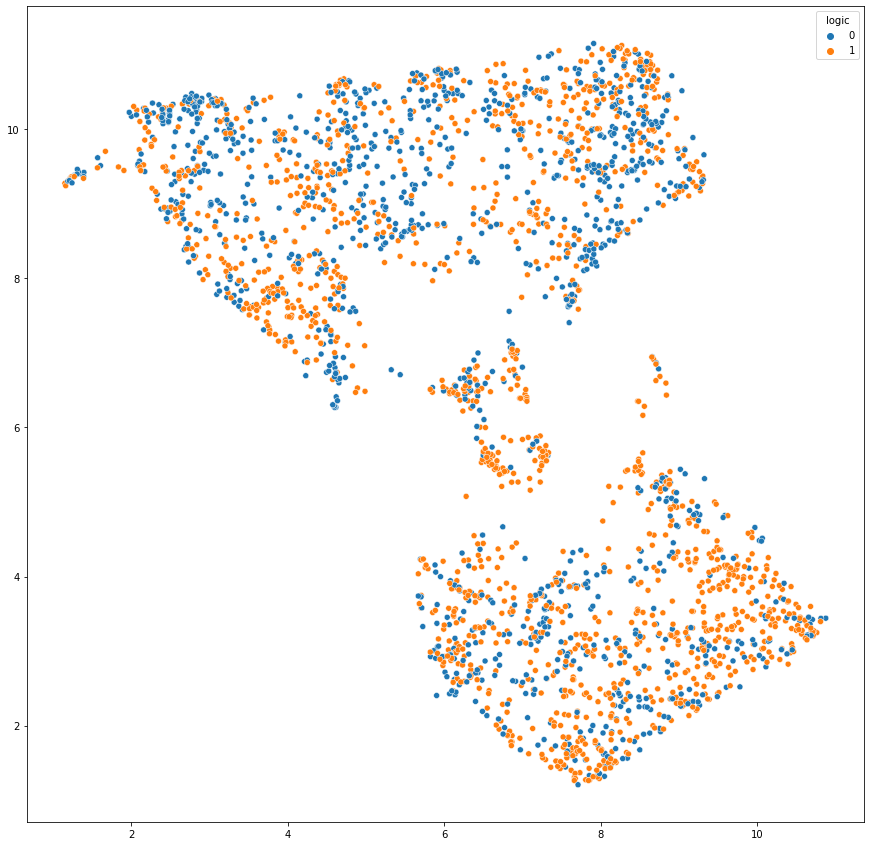

In [27]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=data['logic'])

In [29]:
trimap = TRIMAP()
trimap_data = trimap.fit_transform(X_scaled)

<AxesSubplot:>

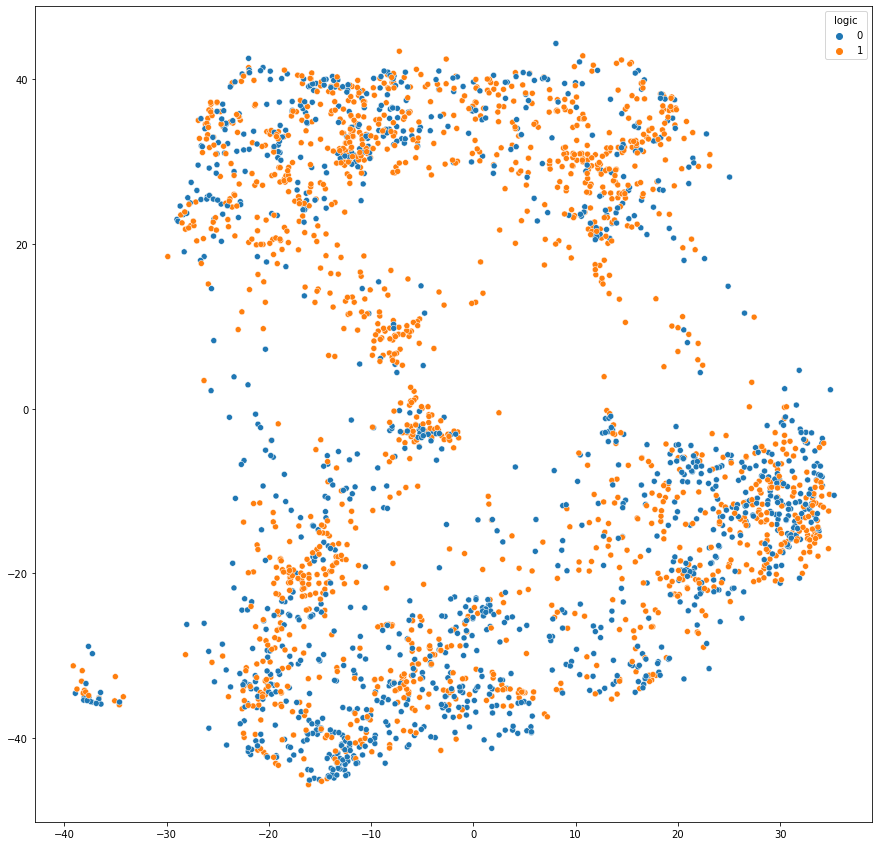

In [30]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=trimap_data[:, 0], y=trimap_data[:, 1], hue=data['logic'])

In [31]:
pacmap = PaCMAP(n_components=2)
pacmap_data = pacmap.fit_transform(X_scaled)

<AxesSubplot:>

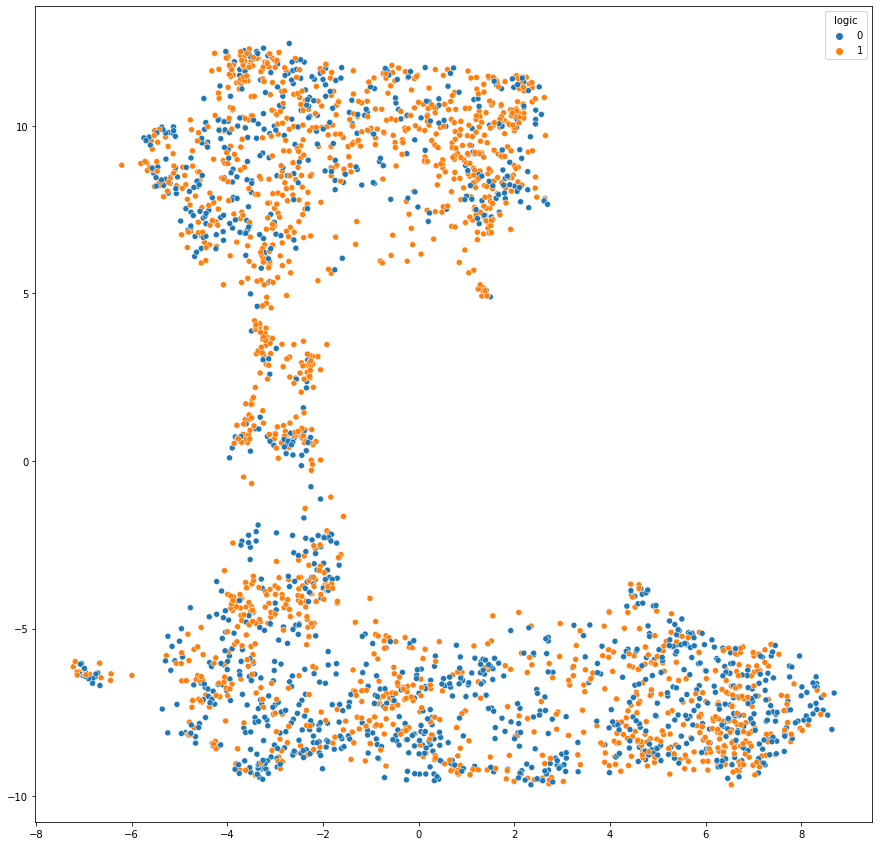

In [32]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=pacmap_data[:, 0], y=pacmap_data[:, 1], hue=data['logic'])

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [ ]:
data2020 = data[[for col in data.columns]]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data.filter(like='2020'), data['logic'], test_size=0.3, shuffle=True)

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
predictions = model.predict(X_test)

In [38]:
accuracy_score(y_test, predictions)

0.6184049079754601